In [20]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [21]:
file = 'dataset.csv'

dataset = pd.read_csv(file)
print(dataset.shape)
dataset.head().transpose()

(1750, 40)


,0,1,2,3,4
종목코드,KR6503313555,KR6503313555,KR6503313555,KR6503322549,KR6503322549
차수,2.0,3.0,4.0,2.0,3.0
평가구분,중간평가,중간평가,중간평가,중간평가,중간평가
평가종료일,2016-05-10,2016-11-08,2017-05-09,2016-04-01,2016-10-04
상환조건(%),80.0,80.0,80.0,80.0,80.0
평가시작일,2015-11-10,2016-05-11,2016-11-09,2015-10-06,2016-04-02
환매결정일,2016-04-25,2016-10-24,2017-04-24,2016-03-17,2016-09-19
발행일,2015-05-14,2015-05-14,2015-05-14,2015-04-10,2015-04-10
상환일,2017-11-09,2017-11-09,2017-11-09,2017-09-29,2017-09-29
상환구분,조기상환,조기상환,조기상환,조기상환,조기상환


In [22]:
dataset['환매일종가위치'].astype('category').cat.codes

0       2
1       2
2       2
3       2
4       2
       ..
1745    2
1746    2
1747    2
1748    2
1749    2
Length: 1750, dtype: int8

In [23]:
cols_drop_info = ['종목코드', '기준가1', '녹인가1', '환매일 종가', '평가기준가']
cols_drop_duplicate = ['평가구분', '상환조건달성'] + ['녹인발생차수'] # unique 값이 1개
cols_drop_future = ['상환구분', '상환실현차수']

cols_drop_dt = ['발행일', '상환일', '평가시작일', '평가종료일', '환매결정일', '녹인발생일']
# 데이터 타입 변경
for col in cols_drop_dt:
    dataset[col] = pd.to_datetime(dataset[col])


# 피처로 쓰기 애매함
cols_cnt = [
    '녹인일수', '녹인일수_전', '영업일수', '상환일수'
]

cols_feature = ['차수', '기초자산개수', '녹인발생차수_차이']
cols_cat = ['환매일종가위치'] # 범주형 변수
cols_dummy = ['환매일종가위치_code']
dataset['환매일종가위치_code'] = dataset['환매일종가위치'].astype('category').cat.codes.astype(float)
cols_pct100 = [
    '상환조건(%)', '하한 수준(%)', '상환조건감소량(%)_prev', '상환조건감소량(%)_next',
    '환매일 수준(%)', '녹인대비상환수준(%)', '환매대비상환수준(%)', '환매대비상환수준(%)_next'
]
cols_pct = [
    '녹인비율', '녹인비율_전', 'H총증감률', 'H평균증감률', 'H일평균증감률', 'H이전대비증감률', '상환비율'
]
# 비율 단위 변경
for col in cols_pct:
    col_new = col+"(%)"
    dataset[col_new] = dataset[col]*100
    cols_pct100.append(col_new)

#
cols_drop = cols_drop_info + cols_drop_duplicate + cols_drop_future + cols_drop_dt + cols_cat


In [24]:
dataset_values = dataset.drop(columns=cols_drop+cols_pct)
dataset_values.shape

(1750, 24)

In [25]:
dataset_values.corr()['label'].sort_values()*100

환매대비상환수준(%)_next    -67.553536
환매대비상환수준(%)         -63.725726
녹인대비상환수준(%)         -45.301966
상환조건(%)             -43.322905
녹인일수                -29.047031
녹인비율(%)             -29.010728
녹인비율_전(%)           -24.791672
녹인일수_전              -24.763035
영업일수                 -8.230238
하한 수준(%)              0.474481
기초자산개수                0.702597
환매일종가위치_code          1.912625
상환조건감소량(%)_prev       2.617679
상환조건감소량(%)_next       8.071058
상환일수                 20.108793
상환비율(%)              20.294334
H일평균증감률(%)           31.551458
H총증감률(%)             31.978728
H평균증감률(%)            32.379763
H이전대비증감률(%)          56.529791
차수                   58.509449
녹인발생차수_차이            58.509449
환매일 수준(%)            59.059747
label               100.000000
Name: label, dtype: float64

In [26]:
dataset_values

,차수,상환조건(%),하한 수준(%),기초자산개수,label,녹인일수,영업일수,녹인일수_전,상환일수,녹인발생차수_차이,...,환매대비상환수준(%),환매대비상환수준(%)_next,환매일종가위치_code,녹인비율(%),녹인비율_전(%),H총증감률(%),H평균증감률(%),H일평균증감률(%),H이전대비증감률(%),상환비율(%)
0,2.0,80.0,55.0,3,0.0,1,112,0.0,0.0,0.0,...,14.767983,14.767983,2.0,0.892857,0.000000,-12.878755,-0.114989,-0.123417,-25.125018,0.0
1,3.0,80.0,55.0,3,0.0,0,113,1.0,0.0,1.0,...,8.477525,8.477525,2.0,0.000000,0.892857,16.689786,0.147697,0.138876,-18.139772,0.0
2,4.0,80.0,55.0,3,1.0,0,111,0.0,0.0,2.0,...,6.628437,1.628437,2.0,0.000000,0.000000,7.772643,0.070024,0.045101,11.073268,0.0
3,2.0,80.0,55.0,3,0.0,3,112,0.0,0.0,0.0,...,17.273914,17.273914,2.0,2.678571,0.000000,-11.656816,-0.104079,-0.090297,-28.997256,0.0
4,3.0,80.0,55.0,3,0.0,0,115,3.0,0.0,1.0,...,10.311141,10.311141,2.0,0.000000,2.678571,12.313689,0.107076,0.091872,-12.611251,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,3.0,85.0,55.0,3,0.0,0,115,23.0,0.0,1.0,...,17.400669,12.400669,2.0,0.000000,20.535714,9.058191,0.078767,0.069928,-13.957895,0.0
1746,4.0,80.0,55.0,3,1.0,0,113,0.0,0.0,2.0,...,10.162713,5.162713,2.0,0.000000,0.000000,4.298326,0.038038,0.056988,8.025408,0.0
1747,2.0,80.0,55.0,3,0.0,23,112,0.0,0.0,0.0,...,21.089000,21.089000,2.0,20.535714,0.000000,-18.224481,-0.162719,-0.168217,-27.960103,0.0
1748,3.0,80.0,55.0,3,0.0,0,115,23.0,0.0,1.0,...,12.400669,12.400669,2.0,0.000000,20.535714,9.058191,0.078767,0.069928,-13.957895,0.0


In [27]:
dataset_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   차수                1750 non-null   float64
 1   상환조건(%)           1750 non-null   float64
 2   하한 수준(%)          1750 non-null   float64
 3   기초자산개수            1750 non-null   int64  
 4   label             1750 non-null   float64
 5   녹인일수              1750 non-null   int64  
 6   영업일수              1750 non-null   int64  
 7   녹인일수_전            1750 non-null   float64
 8   상환일수              1750 non-null   float64
 9   녹인발생차수_차이         1750 non-null   float64
 10  상환조건감소량(%)_prev   1750 non-null   float64
 11  상환조건감소량(%)_next   1750 non-null   float64
 12  녹인대비상환수준(%)       1750 non-null   float64
 13  환매일 수준(%)         1750 non-null   float64
 14  환매대비상환수준(%)       1750 non-null   float64
 15  환매대비상환수준(%)_next  1750 non-null   float64
 16  환매일종가위치_code      1750 non-null   float64


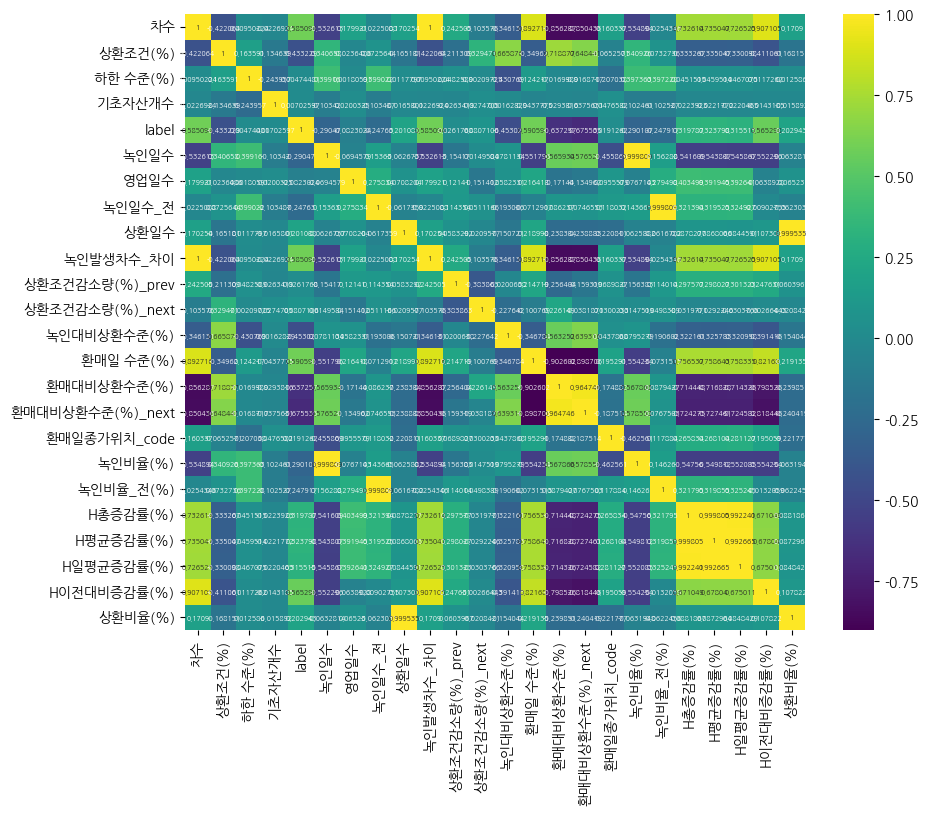

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dataset_values is your data
correlation_matrix = dataset_values.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap with adjusted text size
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='g', annot_kws={'size': 5})

# Show the plot
plt.show()


In [29]:
col_X = cols_feature + cols_pct100
col_y = 'label'

df = dataset[col_X + [col_y]]

X = dataset[col_X]
y = dataset[col_y]

df.shape, X.shape, y.shape

((1750, 19), (1750, 18), (1750,))

In [30]:
X.head(2).transpose()

,0,1
차수,2.000000,3.000000
기초자산개수,3.000000,3.000000
녹인발생차수_차이,0.000000,1.000000
상환조건(%),80.000000,80.000000
하한 수준(%),55.000000,55.000000
상환조건감소량(%)_prev,-0.000000,-0.000000
상환조건감소량(%)_next,0.000000,0.000000
환매일 수준(%),65.232017,71.522475
녹인대비상환수준(%),25.000000,25.000000
환매대비상환수준(%),14.767983,8.477525


In [31]:
col_X

['차수',
 '기초자산개수',
 '녹인발생차수_차이',
 '상환조건(%)',
 '하한 수준(%)',
 '상환조건감소량(%)_prev',
 '상환조건감소량(%)_next',
 '환매일 수준(%)',
 '녹인대비상환수준(%)',
 '환매대비상환수준(%)',
 '환매대비상환수준(%)_next',
 '녹인비율(%)',
 '녹인비율_전(%)',
 'H총증감률(%)',
 'H평균증감률(%)',
 'H일평균증감률(%)',
 'H이전대비증감률(%)',
 '상환비율(%)']

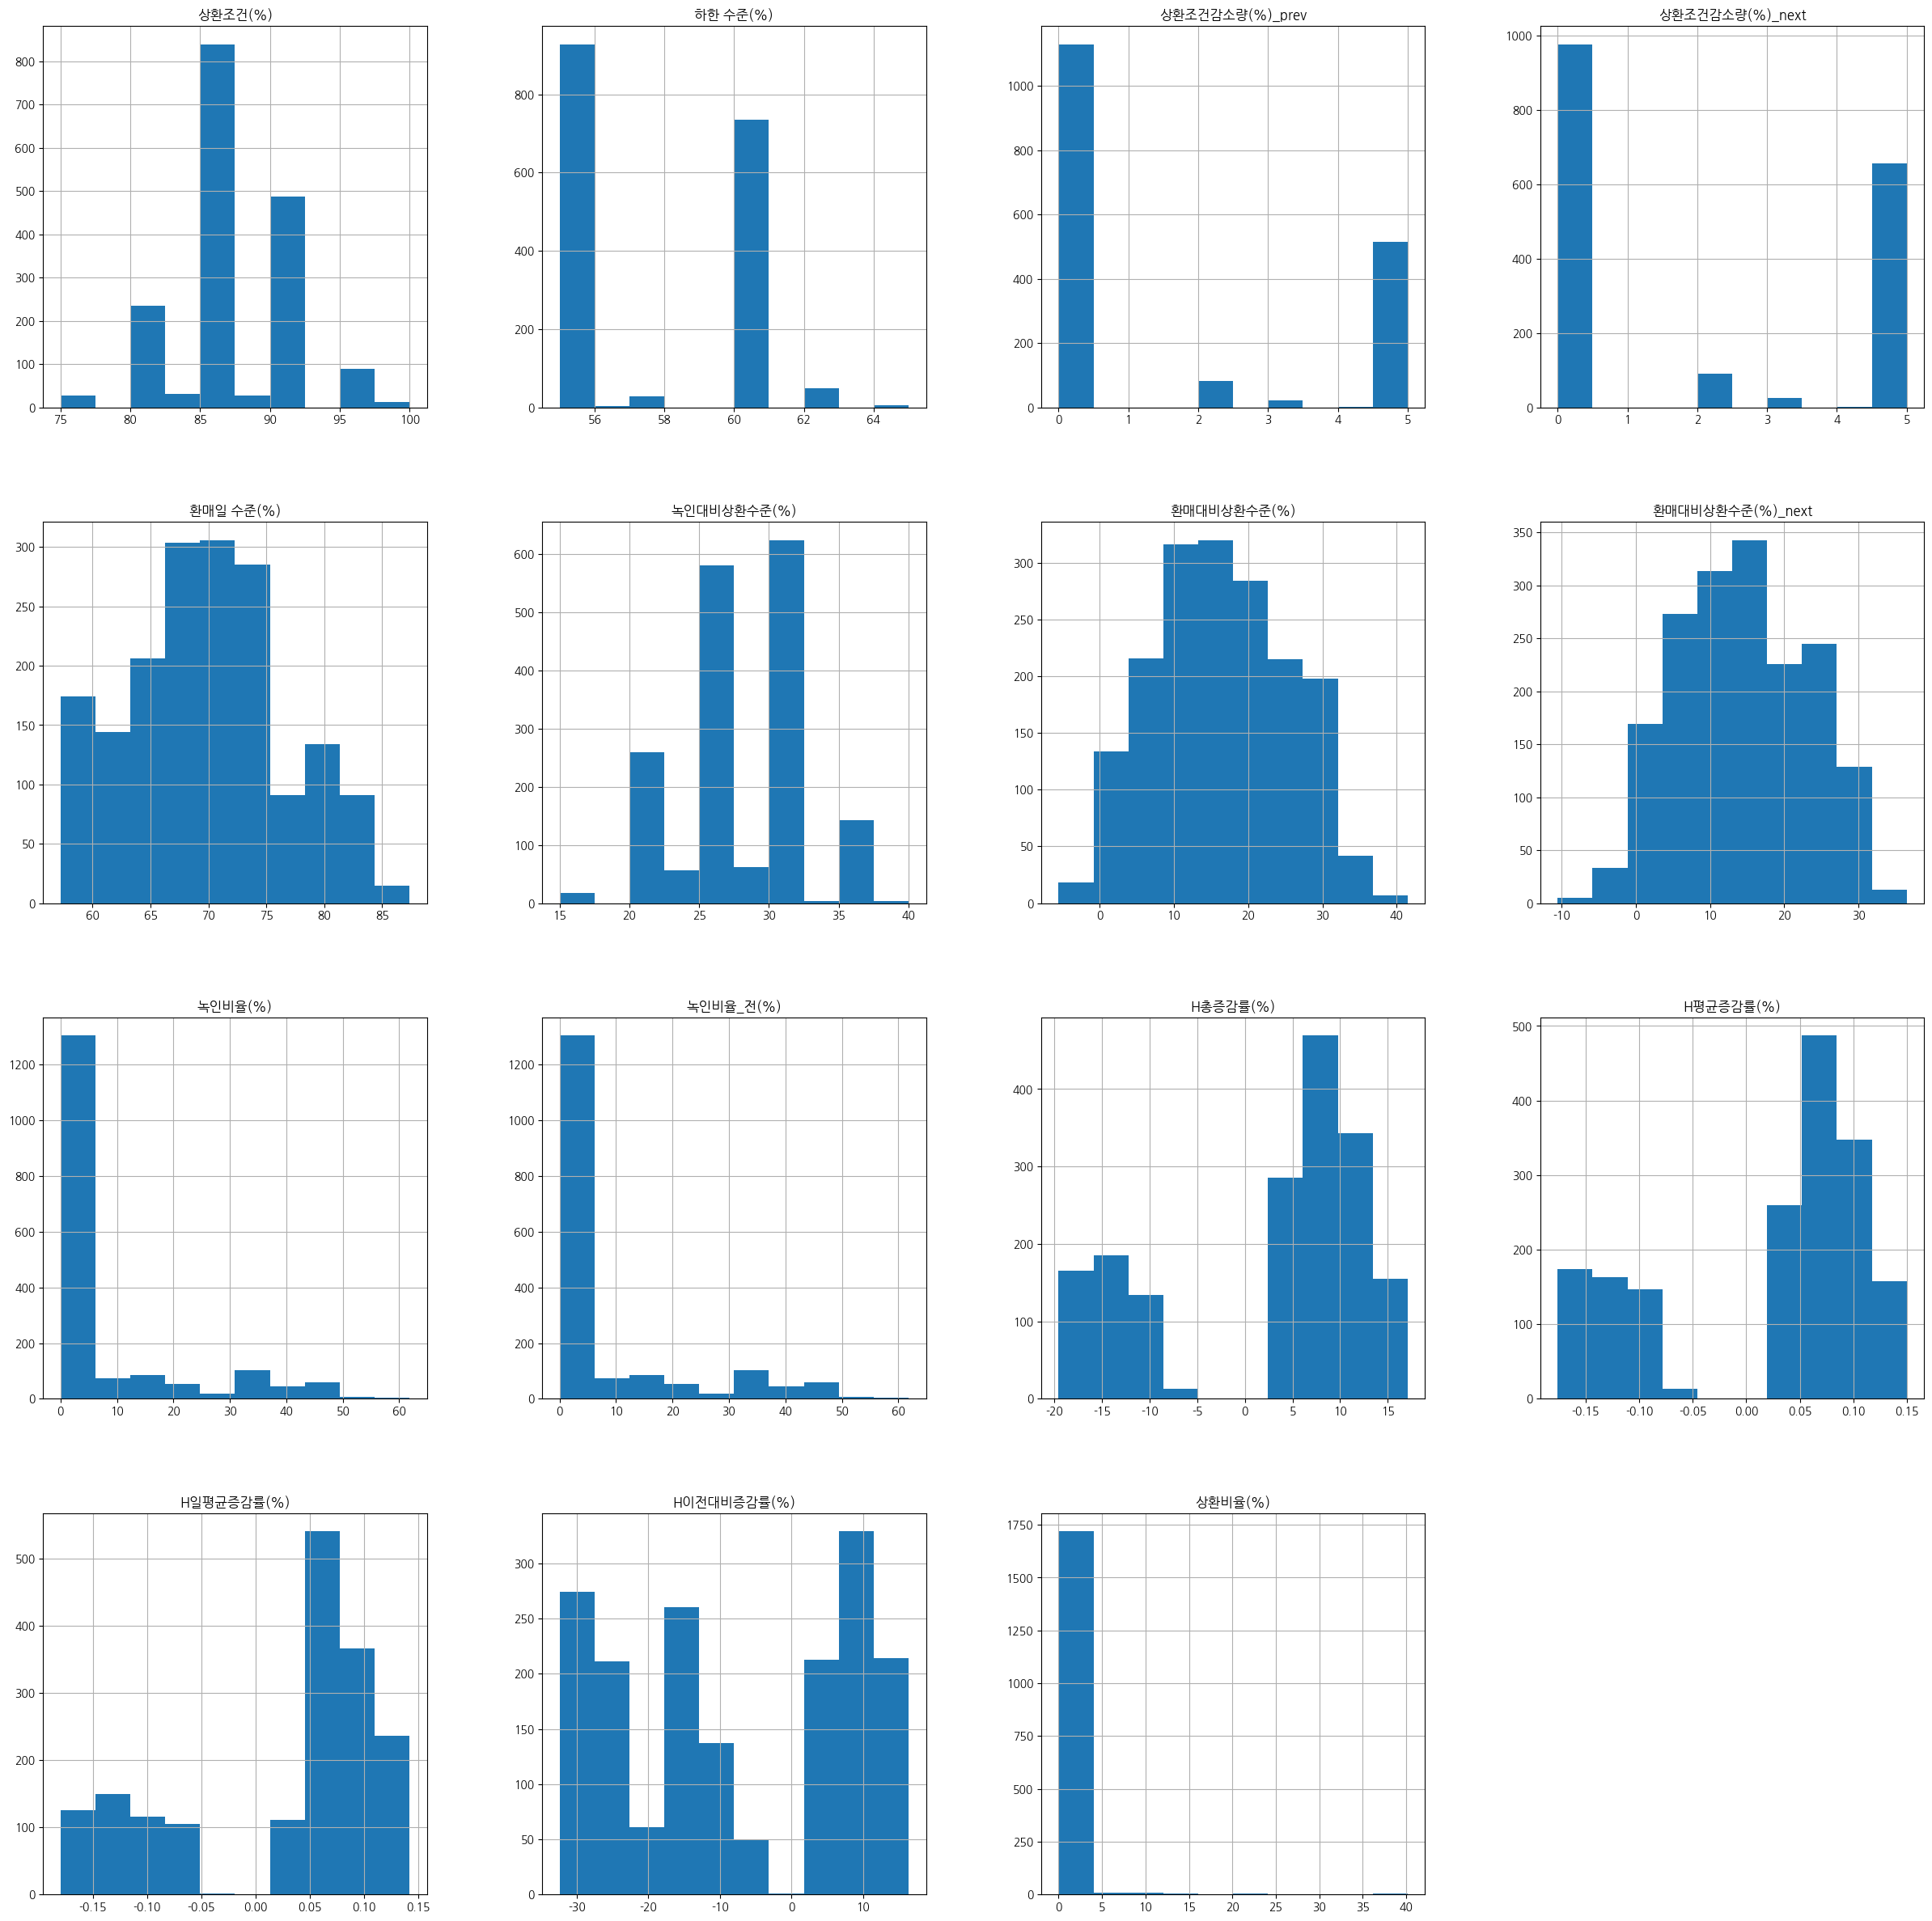

In [32]:
X[cols_pct100].hist(figsize=(30, 30))
plt.show()

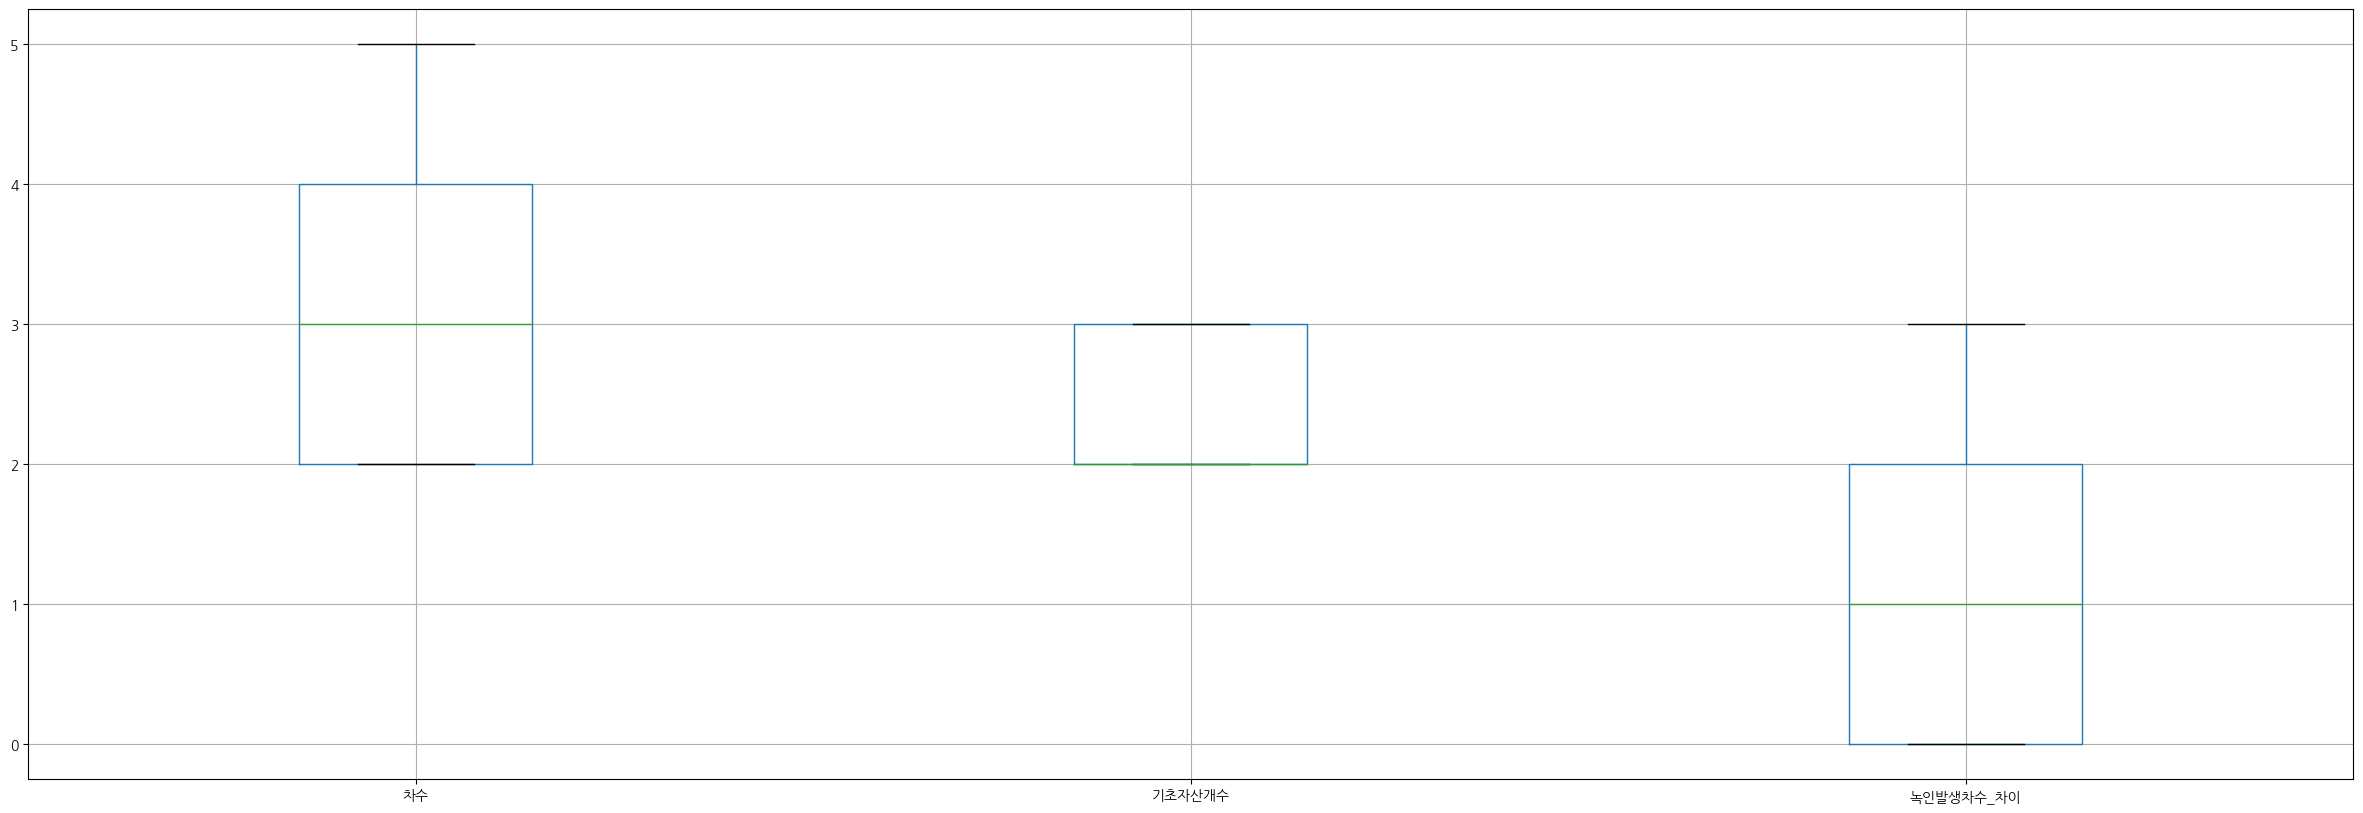

In [33]:
X[cols_feature].boxplot(figsize=(30, 10))
plt.show()

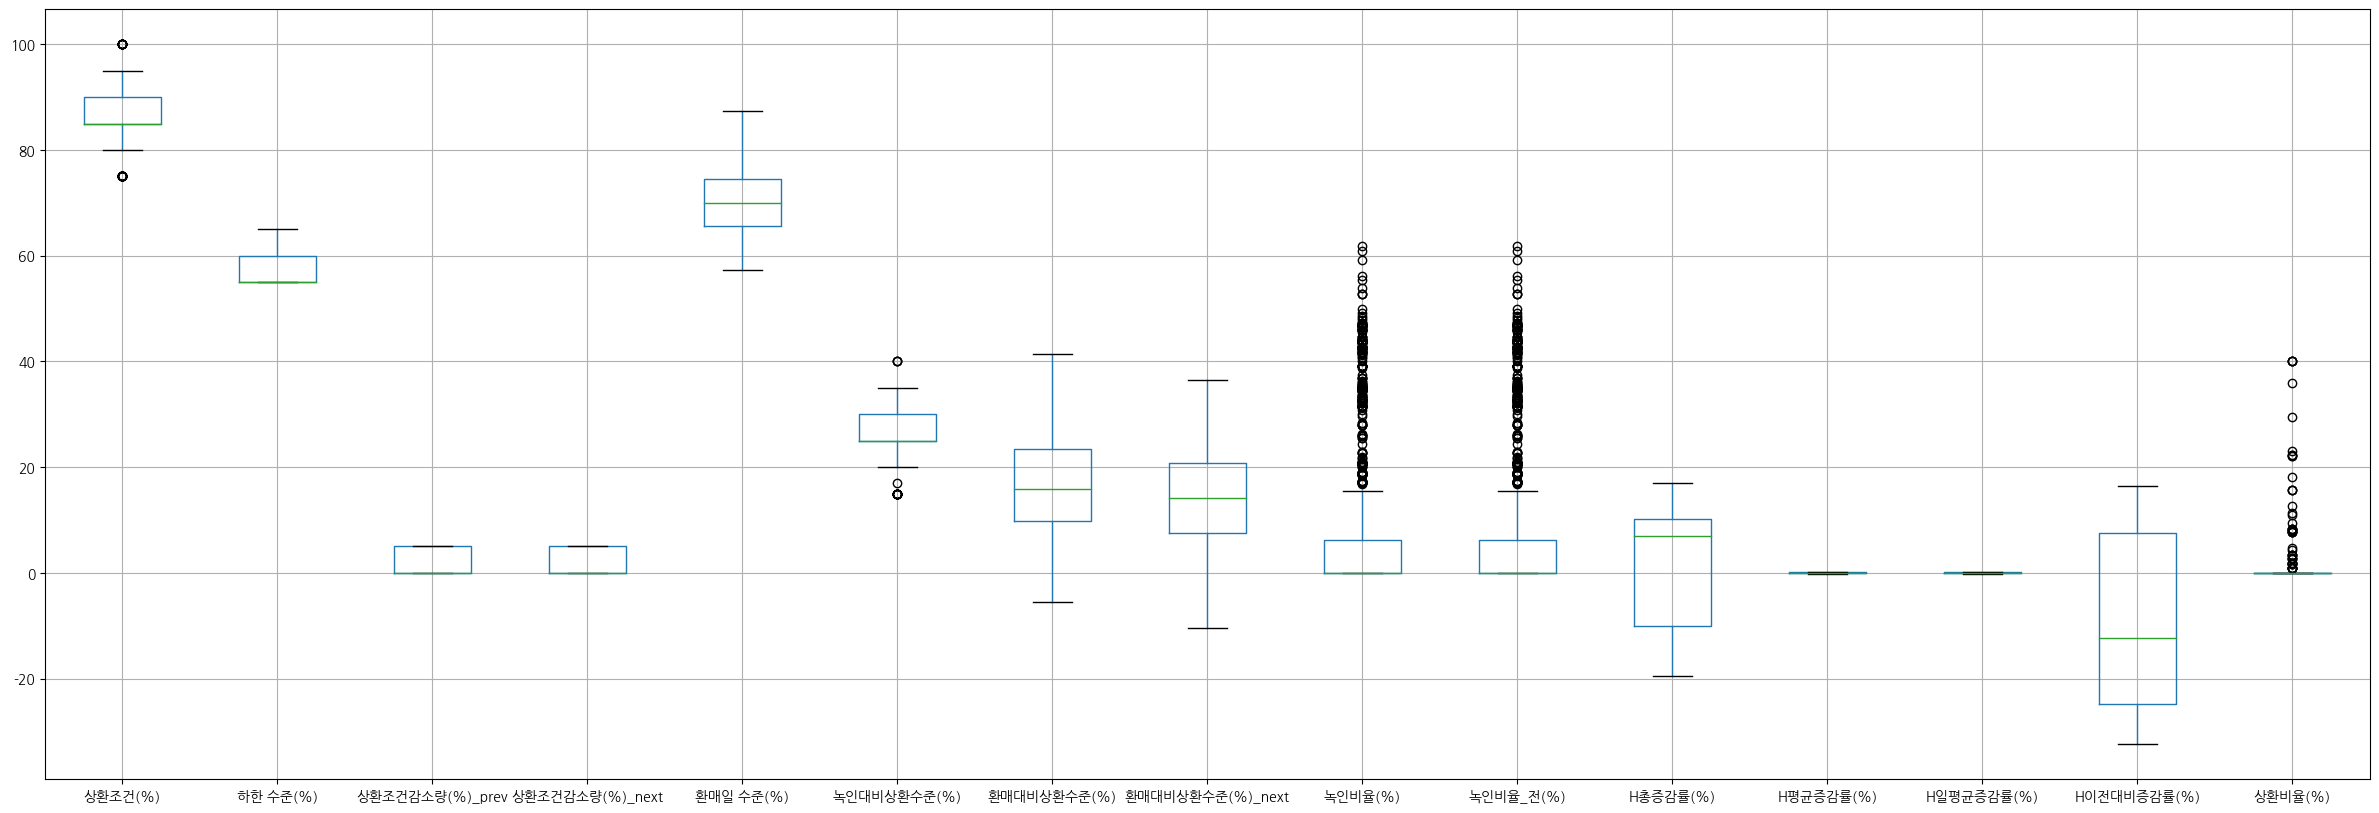

In [34]:
X[cols_pct100].boxplot(figsize=(30, 10))
plt.show()

In [35]:
y.value_counts()

label
0.0    1346
1.0     404
Name: count, dtype: int64

In [36]:
X.columns

Index(['차수', '기초자산개수', '녹인발생차수_차이', '상환조건(%)', '하한 수준(%)', '상환조건감소량(%)_prev',
       '상환조건감소량(%)_next', '환매일 수준(%)', '녹인대비상환수준(%)', '환매대비상환수준(%)',
       '환매대비상환수준(%)_next', '녹인비율(%)', '녹인비율_전(%)', 'H총증감률(%)', 'H평균증감률(%)',
       'H일평균증감률(%)', 'H이전대비증감률(%)', '상환비율(%)'],
      dtype='object')

In [37]:
from sklearn.preprocessing import StandardScaler

# Assuming cols_feature_long is your DataFrame
# Select only the numerical columns for scaling
columns_to_scale = ['차수', '기초자산개수', '녹인발생차수_차이', '상환조건(%)', '하한 수준(%)', '상환조건감소량(%)_prev',
       '상환조건감소량(%)_next', '환매일 수준(%)', '녹인대비상환수준(%)', '환매대비상환수준(%)',
       '환매대비상환수준(%)_next', '녹인비율(%)', '녹인비율_전(%)', 'H총증감률(%)', 'H평균증감률(%)',
       'H일평균증감률(%)', 'H이전대비증감률(%)', '상환비율(%)']


# Create a subset of the DataFrame with only the selected columns
subset_df = X[columns_to_scale]

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns and transform them
scaled_data = scaler.fit_transform(subset_df)

# Update the original DataFrame with the scaled values
X[columns_to_scale] = scaled_data


In [38]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data_frame):
    # VIF 데이터프레임 생성
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]

    return vif_data

# data: 독립 변수들을 포함한 데이터프레임
vif_result = calculate_vif(X)

In [46]:
vif_result

,Variable,VIF
0,차수,inf
1,기초자산개수,1.086283
2,녹인발생차수_차이,inf
3,상환조건(%),inf
4,하한 수준(%),inf
5,상환조건감소량(%)_prev,1.374840
6,상환조건감소량(%)_next,inf
7,환매일 수준(%),inf
8,녹인대비상환수준(%),inf
9,환매대비상환수준(%),inf


In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   차수                1750 non-null   float64
 1   기초자산개수            1750 non-null   float64
 2   녹인발생차수_차이         1750 non-null   float64
 3   상환조건(%)           1750 non-null   float64
 4   하한 수준(%)          1750 non-null   float64
 5   상환조건감소량(%)_prev   1750 non-null   float64
 6   상환조건감소량(%)_next   1750 non-null   float64
 7   환매일 수준(%)         1750 non-null   float64
 8   녹인대비상환수준(%)       1750 non-null   float64
 9   환매대비상환수준(%)       1750 non-null   float64
 10  환매대비상환수준(%)_next  1750 non-null   float64
 11  녹인비율(%)           1750 non-null   float64
 12  녹인비율_전(%)         1750 non-null   float64
 13  H총증감률(%)          1750 non-null   float64
 14  H평균증감률(%)         1750 non-null   float64
 15  H일평균증감률(%)        1750 non-null   float64
 16  H이전대비증감률(%)       1750 non-null   float64


In [45]:
X.corr()

,차수,기초자산개수,녹인발생차수_차이,상환조건(%),하한 수준(%),상환조건감소량(%)_prev,상환조건감소량(%)_next,환매일 수준(%),녹인대비상환수준(%),환매대비상환수준(%),환매대비상환수준(%)_next,녹인비율(%),녹인비율_전(%),H총증감률(%),H평균증감률(%),H일평균증감률(%),H이전대비증감률(%),상환비율(%)
차수,1.000000,-0.022692,1.000000,-0.422064,0.009502,0.242505,-0.103576,0.892716,-0.346131,-0.856287,-0.850436,-0.534894,-0.025435,0.732614,0.735047,0.726525,0.907105,0.170900
기초자산개수,-0.022692,1.000000,-0.022692,-0.134639,-0.243957,-0.026342,0.027471,-0.043778,0.001628,-0.029382,-0.037563,-0.102461,-0.102527,-0.022392,-0.022177,-0.022047,-0.014319,-0.015892
녹인발생차수_차이,1.000000,-0.022692,1.000000,-0.422064,0.009502,0.242505,-0.103576,0.892716,-0.346131,-0.856287,-0.850436,-0.534894,-0.025435,0.732614,0.735047,0.726525,0.907105,0.170900
상환조건(%),-0.422064,-0.134639,-0.422064,1.000000,0.163591,-0.211309,0.329471,-0.349620,0.665876,0.718877,0.648441,0.340926,0.073274,-0.333267,-0.335047,-0.330098,-0.411061,-0.168151
하한 수준(%),0.009502,-0.243957,0.009502,0.163591,1.000000,0.048259,-0.002097,0.124217,-0.430769,-0.016999,-0.016872,0.397363,0.397228,0.045151,0.045951,0.046708,0.011726,0.012586
상환조건감소량(%)_prev,0.242505,-0.026342,0.242505,-0.211309,0.048259,1.000000,-0.383863,0.214719,-0.020064,-0.256404,-0.159319,-0.156383,0.114014,0.297577,0.298027,0.301323,0.247631,0.060397
상환조건감소량(%)_next,-0.103576,0.027471,-0.103576,0.329471,-0.002097,-0.383863,1.000000,-0.100769,-0.227642,0.226149,-0.038187,0.014752,0.049839,-0.031977,-0.029225,-0.030377,-0.002664,-0.020842
환매일 수준(%),0.892716,-0.043778,0.892716,-0.349620,0.124217,0.214719,-0.100769,1.000000,-0.346784,-0.902602,-0.898706,-0.554234,-0.073151,0.756537,0.758643,0.758335,0.821680,0.219135
녹인대비상환수준(%),-0.346131,0.001628,-0.346131,0.665876,-0.430769,-0.020064,-0.227642,-0.346784,1.000000,0.563252,0.639316,0.079528,-0.190602,-0.322161,-0.325783,-0.320958,-0.391416,-0.154044
환매대비상환수준(%),-0.856287,-0.029382,-0.856287,0.718877,-0.016999,-0.256404,0.226149,-0.902602,0.563252,1.000000,0.964746,0.567866,0.087943,-0.714448,-0.716828,-0.714326,-0.798526,-0.239851


In [218]:
#### wrapper

# Forward Selection

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 학습 데이터와 검증 데이터 분리
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Forward feature selection 수행
selected_features = []
best_score = 0

while len(selected_features) < X.shape[1]: #무한 반복 루프 전체 특성의 개수보다 선택된 특성의 개수가 작을때 까지 반복
    best_feature = None #가장좋은 특성 이름
    best_model = None #가장좋은 모델 저장
    best_score_local = 0 #가장 높은 정확도

    for feature in X_train.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train[features]
            X_val_selected = X_val[features]

            model = LogisticRegression()
            model.fit(X_train_selected, y_train)
            score = model.score(X_val_selected, y_val)

            if score > best_score_local:
                best_score_local = score
                best_feature = feature
                best_model = model

    if best_score_local > best_score:
        selected_features.append(best_feature)
        best_score = best_score_local
        print(f"Selected feature: {best_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nForward selected features:")
Forward = selected_features
print(Forward)

Selected feature: 환매대비상환수준(%)_next, Accuracy: 0.9114
Selected feature: 환매일 수준(%), Accuracy: 0.9343
Selected feature: H이전대비증감률(%), Accuracy: 0.9457
Selected feature: 기초자산개수, Accuracy: 0.9486
Selected feature: 녹인비율_전(%), Accuracy: 0.9514

Forward selected features:
['환매대비상환수준(%)_next', '환매일 수준(%)', 'H이전대비증감률(%)', '기초자산개수', '녹인비율_전(%)']


In [219]:
# Backward Elimination
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 학습 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,stratify= y)

# Backward feature selection 수행
selected_features = X_train.columns.tolist()
best_score = 0

while len(selected_features) > 0:
    worst_feature = None
    best_model = None
    best_score_local = 0

    for feature in selected_features:
        features = selected_features.copy()
        features.remove(feature)

        X_train_selected = X_train[features]
        X_val_selected = X_val[features]

        model = LogisticRegression()
        model.fit(X_train_selected, y_train)
        score = model.score(X_val_selected, y_val)

        if score > best_score_local:
            best_score_local = score
            worst_feature = feature
            best_model = model

    if best_score_local > best_score:
        selected_features.remove(worst_feature)
        best_score = best_score_local
        print(f"Removed feature: {worst_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nFinal selected features:")
Backward = selected_features
print(Backward)


Removed feature: 차수, Accuracy: 0.9429

Final selected features:
['기초자산개수', '녹인발생차수_차이', '상환조건(%)', '하한 수준(%)', '상환조건감소량(%)_prev', '상환조건감소량(%)_next', '환매일 수준(%)', '녹인대비상환수준(%)', '환매대비상환수준(%)', '환매대비상환수준(%)_next', '녹인비율(%)', '녹인비율_전(%)', 'H총증감률(%)', 'H평균증감률(%)', 'H일평균증감률(%)', 'H이전대비증감률(%)', '상환비율(%)']


In [220]:
# Stepwise Selection
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 학습 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

# Stepwise feature selection 수행
selected_features = []
best_score = 0

# Forward step
while len(selected_features) < X.shape[1]:
    best_feature = None
    best_model = None
    best_score_local = 0

    for feature in X_train.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train[features]
            X_val_selected = X_val[features]

            model = LogisticRegression()
            model.fit(X_train_selected, y_train)
            score = model.score(X_val_selected, y_val)

            if score > best_score_local:
                best_score_local = score
                best_feature = feature
                best_model = model

    if best_score_local > best_score:
        selected_features.append(best_feature)
        best_score = best_score_local
        print(f"Selected feature: {best_feature}, Accuracy: {best_score:.4f}")

    else:
        break

# Backward step
while len(selected_features) > 0:
    worst_feature = None
    best_model = None
    best_score_local = 0

    for feature in selected_features:
        features = selected_features.copy()
        features.remove(feature)

        X_train_selected = X_train[features]
        X_val_selected = X_val[features]

        model = LogisticRegression()
        model.fit(X_train_selected, y_train)
        score = model.score(X_val_selected, y_val)

        if score > best_score_local:
            best_score_local = score
            worst_feature = feature
            best_model = model

    if best_score_local > best_score:
        selected_features.remove(worst_feature)
        best_score = best_score_local
        print(f"Removed feature: {worst_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nFinal selected features:")
Stepwise = selected_features


Selected feature: 환매대비상환수준(%)_next, Accuracy: 0.9114
Selected feature: 환매일 수준(%), Accuracy: 0.9343
Selected feature: H이전대비증감률(%), Accuracy: 0.9457
Selected feature: 기초자산개수, Accuracy: 0.9486
Selected feature: 녹인비율_전(%), Accuracy: 0.9514

Final selected features:


2. filter

In [221]:
# H가 1인 경우 이분산성 / H가 0인 경우 등분산
from scipy.stats import bartlett
def bartlett_test(col, p_value = 0.05, H = 1):
    list= []
    for i in col:
        T, p_val =bartlett(df[df['label']==1][i], df[df['label']==0][i]) 
        list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    if H == 1:
        a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
        return a
    else:
        a = list[(list['p_value'] >= p_value)][['변수', 'p_value']].sort_values('p_value')
        return a

In [222]:
# 이분산성 변수
x_hetero = bartlett_test(df.columns, H = 1)
# 등분산성 변수
x_homo = bartlett_test(df.columns, H = 0)

In [223]:
# t-test

import scipy.stats as stats
def t_test(col, col_h0, col_h1, p_value = 0.05):
    list= []
    for i in col:
        if (col_h0['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(df[df['label']==1][i], df[df['label']==0][i], equal_var=True) # 등분산성 : wald t-test
            list.append([i, p_val])
        elif (col_h1['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(df[df['label']==1][i], df[df['label']==0][i], equal_var=False) # 이분산성 : welch’s t-test
            list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
    return a

In [224]:
# 2) t_test 결과 p_value < 0.05보다 작은 유의한 변수 가져오기
x_ttest = t_test(df.columns, x_homo, x_hetero, p_value=0.1)
print("유의한 피쳐 수 :", len(x_ttest))
x_ttest.sort_values(by="변수", ascending=True)

유의한 피쳐 수 : 15


,변수,p_value
16,H이전대비증감률(%),1.431448e-310
15,H일평균증감률(%),8.974853e-104
13,H총증감률(%),2.099442e-104
14,H평균증감률(%),1.361149e-107
8,녹인대비상환수준(%),2.729595e-89
2,녹인발생차수_차이,9.187215e-221
11,녹인비율(%),5.608189e-100
12,녹인비율_전(%),1.568664e-63
17,상환비율(%),2.262085e-06
3,상환조건(%),1.149381e-95


In [225]:
ttest = list(x_ttest['변수'])
ttest

['환매대비상환수준(%)_next',
 'H이전대비증감률(%)',
 '환매대비상환수준(%)',
 '차수',
 '녹인발생차수_차이',
 '환매일 수준(%)',
 'H평균증감률(%)',
 'H총증감률(%)',
 'H일평균증감률(%)',
 '녹인비율(%)',
 '상환조건(%)',
 '녹인대비상환수준(%)',
 '녹인비율_전(%)',
 '상환비율(%)',
 '상환조건감소량(%)_next']

In [226]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

lasso_model = LogisticRegression()
param_grid = {'penalty' : ['l1'], 
                'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10],
                'solver' : ['liblinear']}

grid_search = GridSearchCV(lasso_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(X_train, y_train)

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV 최고 정확도:0.9529


In [227]:
lasso_best = LogisticRegression(C=2, penalty='l1', solver='liblinear').fit(X_train, y_train)

df_lasso = pd.DataFrame()
df_lasso['feature'] = X_train.columns
df_lasso['coef'] = lasso_best.coef_[0]
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
df_lasso

,feature,coef
0,차수,0.949002
1,기초자산개수,-0.150068
2,녹인발생차수_차이,-0.745439
3,상환조건(%),-0.017096
4,하한 수준(%),-0.000741
5,상환조건감소량(%)_prev,-0.100951
6,상환조건감소량(%)_next,0.009629
7,환매일 수준(%),-0.011554
8,녹인대비상환수준(%),-0.257924
10,환매대비상환수준(%)_next,-0.510470


In [228]:
# 라쏘에서 선택된 피처
lasso = df_lasso['feature'].values.tolist()
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')
lasso

Lasso에서 선택된 피처 수 15 개


['차수',
 '기초자산개수',
 '녹인발생차수_차이',
 '상환조건(%)',
 '하한 수준(%)',
 '상환조건감소량(%)_prev',
 '상환조건감소량(%)_next',
 '환매일 수준(%)',
 '녹인대비상환수준(%)',
 '환매대비상환수준(%)_next',
 '녹인비율(%)',
 '녹인비율_전(%)',
 'H총증감률(%)',
 'H이전대비증감률(%)',
 '상환비율(%)']

In [229]:
list_Forward = list(Forward)
list_Backward = list(Backward)
list_Stepwise = list(Stepwise)
list_ttest= list(ttest)
list_lasso = list(lasso)
list_col_all = X_train.columns

In [230]:
def func_Forward(x):
    if x in list_Forward:
        return 1
    else:
        return 0
    
def func_Backward(x):
    if x in list_Backward:
        return 1
    else:
        return 0


def func_Stepwise(x):
    if x in list_Stepwise:
        return 1
    else:
        return 0

def func_ttest(x):
    if x in list_ttest:
        return 1
    else:
        return 0
    
def func_lasso(x):
    if x in list_lasso:
        return 1
    else:
        return 0

In [231]:
# 2번 선택된 Feature

feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['Forward'] = list_col_all.map(func_Forward)
feature_counts['Backward'] = list_col_all.map(func_Backward)
feature_counts['Stepwise'] = list_col_all.map(func_Stepwise)
feature_counts['ttest'] = list_col_all.map(func_ttest)
feature_counts['lasso'] = list_col_all.map(func_lasso)

feature_counts["total"] = feature_counts["Forward"]+feature_counts['Backward']+feature_counts["Stepwise"]+feature_counts["ttest"]+feature_counts["lasso"]
feature_final = feature_counts[feature_counts["total"]>=2]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 18


,Feature,Forward,Backward,Stepwise,ttest,lasso,total
0,차수,0,0,0,1,1,2
1,기초자산개수,1,1,1,0,1,4
2,녹인발생차수_차이,0,1,0,1,1,3
3,상환조건(%),0,1,0,1,1,3
4,하한 수준(%),0,1,0,0,1,2
5,상환조건감소량(%)_prev,0,1,0,0,1,2
6,상환조건감소량(%)_next,0,1,0,1,1,3
7,환매일 수준(%),1,1,1,1,1,5
8,녹인대비상환수준(%),0,1,0,1,1,3
9,환매대비상환수준(%),0,1,0,1,0,2


In [232]:
# 3번 선택된 Feature

feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['Forward'] = list_col_all.map(func_Forward)
feature_counts['Backward'] = list_col_all.map(func_Backward)
feature_counts['Stepwise'] = list_col_all.map(func_Stepwise)
feature_counts['ttest'] = list_col_all.map(func_ttest)
feature_counts['lasso'] = list_col_all.map(func_lasso)

feature_counts["total"] = feature_counts["Forward"]+feature_counts['Backward']+feature_counts["Stepwise"]+feature_counts["ttest"]+feature_counts["lasso"]
feature_final = feature_counts[feature_counts["total"]>=3]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 12


,Feature,Forward,Backward,Stepwise,ttest,lasso,total
1,기초자산개수,1,1,1,0,1,4
2,녹인발생차수_차이,0,1,0,1,1,3
3,상환조건(%),0,1,0,1,1,3
6,상환조건감소량(%)_next,0,1,0,1,1,3
7,환매일 수준(%),1,1,1,1,1,5
8,녹인대비상환수준(%),0,1,0,1,1,3
10,환매대비상환수준(%)_next,1,1,1,1,1,5
11,녹인비율(%),0,1,0,1,1,3
12,녹인비율_전(%),1,1,1,1,1,5
13,H총증감률(%),0,1,0,1,1,3


In [233]:
feature_final.value_counts()

Feature           Forward  Backward  Stepwise  ttest  lasso  total
H이전대비증감률(%)       1        1         1         1      1      5        1
H총증감률(%)          0        1         0         1      1      3        1
기초자산개수            1        1         1         0      1      4        1
녹인대비상환수준(%)       0        1         0         1      1      3        1
녹인발생차수_차이         0        1         0         1      1      3        1
녹인비율(%)           0        1         0         1      1      3        1
녹인비율_전(%)         1        1         1         1      1      5        1
상환비율(%)           0        1         0         1      1      3        1
상환조건(%)           0        1         0         1      1      3        1
상환조건감소량(%)_next   0        1         0         1      1      3        1
환매대비상환수준(%)_next  1        1         1         1      1      5        1
환매일 수준(%)         1        1         1         1      1      5        1
Name: count, dtype: int64

In [234]:
# X= X[['H이전대비증감률(%)', 'H총증감률(%)', '녹인대비상환수준(%)', '녹인발생차수_차이', '녹인비율(%)', '녹인비율_전(%)','상환비율(%)','상환조건(%)','상환조건감소량(%)_next', '환매대비상환수준(%)_next','환매일 수준(%)']]
X = X[['환매일 수준(%)', '환매대비상환수준(%)_next', '녹인비율_전(%)','H이전대비증감률(%)' ]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

In [235]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_val)

# 모델 성능평가
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[258  11]
 [  8  73]]
Accuracy : 0.946
Precision : 0.869
Recall : 0.901
F1 : 0.885


In [236]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

# fit
dt.fit(X_train, y_train)

# 예측
y_pred = dt.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[268   1]
 [  9  72]]
Accuracy : 0.971
Precision : 0.986
Recall : 0.889
F1 : 0.935


In [237]:
from sklearn.svm import SVC
svc = SVC(random_state=0, probability=True)

# fit
svc.fit(X_train, y_train)

# 예측
y_pred = svc.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[253  16]
 [ 12  69]]
Accuracy : 0.920
Precision : 0.812
Recall : 0.852
F1 : 0.831


In [238]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

# fit
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[267   2]
 [  7  74]]
Accuracy : 0.974
Precision : 0.974
Recall : 0.914
F1 : 0.943


In [239]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

# fit
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[268   1]
 [  5  76]]
Accuracy : 0.983
Precision : 0.987
Recall : 0.938
F1 : 0.962


In [240]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier()

# fit
lgbm_model.fit(X_train, y_train)

# 예측
y_pred = lgbm_model.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 323, number of negative: 1077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230714 -> initscore=-1.204282
[LightGBM] [Info] Start training from score -1.204282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [241]:
def model_basic(X_train, y_train, X_test, y_test):
    models = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        SVC(),
        RandomForestClassifier(),
        XGBClassifier(),
        LGBMClassifier()
    ]

    rdict={'model':[],'accuracy':[],'precision':[],'recall':[],'f1_score':[]}

    
    for clf in models:
        clf = clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        results = (round(accuracy_score(y_test, pred),2),
                    round(precision_score(y_test, pred),2),
                    round(recall_score(y_test, pred),2),
                    round(f1_score(y_test, pred),2))
        rdict['model'].append(clf); 
        rdict['accuracy'].append(results[0])
        rdict['precision'].append(results[1])
        rdict['recall'].append(results[2])
        rdict['f1_score'].append(results[3])

        # print(results)

    rdf = pd.DataFrame(data=rdict)
    return rdf 

In [242]:
model_basic(X_train, y_train, X_val, y_val)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 323, number of negative: 1077
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230714 -> initscore=-1.204282
[LightGBM] [Info] Start training from score -1.204282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

,model,accuracy,precision,recall,f1_score
0,LogisticRegression(),0.95,0.87,0.90,0.88
1,DecisionTreeClassifier(),0.97,0.99,0.90,0.94
2,SVC(),0.92,0.81,0.85,0.83
3,"(DecisionTreeClassifier(max_features='sqrt', r...",0.97,0.97,0.91,0.94
4,"XGBClassifier(base_score=None, booster=None, c...",0.98,0.99,0.94,0.96
5,LGBMClassifier(),0.98,0.99,0.93,0.96


In [243]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', 
                            solver='saga', 
                            C=10, 
                            l1_ratio=1)

model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[255  14]
 [ 12  69]]
Accuracy : 0.926
Precision : 0.831
Recall : 0.852
F1 : 0.841


In [244]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', 
                            max_depth = 10, 
                            min_samples_split = 5, 
                            min_samples_leaf = 10)

# fit
dt.fit(X_train, y_train)

# 예측
y_pred = dt.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[260   9]
 [ 12  69]]
Accuracy : 0.940
Precision : 0.885
Recall : 0.852
F1 : 0.868


In [245]:
from sklearn.svm import SVC
svc = SVC(random_state=0, 
          C = 10, 
          kernel = 'linear')
# C = 클수록 정확하게 (마진이 작아짐, 과대적합) / 작을수록 과대적합 방지
# gamma 클수록 정확하게 과대적합, 작을수록 과대적합 방지 (비선형 rbf, poly 에서만 옵션 사용)

# fit
svc.fit(X_train, y_train)

# 예측
y_pred = svc.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[259  10]
 [ 10  71]]
Accuracy : 0.943
Precision : 0.877
Recall : 0.877
F1 : 0.877


In [246]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators= 500,
                                    criterion= 'entropy',
                                    max_depth= 10,
                                    min_samples_leaf= 5,
                                    max_features= 5,
                                    min_samples_split= 5)

# fit
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[262   7]
 [ 12  69]]
Accuracy : 0.946
Precision : 0.908
Recall : 0.852
F1 : 0.879


In [247]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators = 150,
                            learning_rate = 0.2,
                            max_depth = 10,
                            min_child_weight = 5,
                            gamma = 10)

# fit
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[[257  12]
 [ 10  71]]
Accuracy : 0.937
Precision : 0.855
Recall : 0.877
F1 : 0.866


In [248]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(max_depth=12,
                            learning_rate=0.2,
                            n_estimators=500)

# fit
lgbm_model.fit(X_train, y_train)

# 예측
y_pred = lgbm_model.predict(X_val)


# 모델 성능평가
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_val, y_pred)
print(cf_matrix)


# score print
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print("Accuracy : %.3f" % accuracy_score(y_val, y_pred))
print("Precision : %.3f" % precision_score(y_val, y_pred))
print("Recall : %.3f" % recall_score(y_val, y_pred))
print("F1 : %.3f" % f1_score(y_val, y_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 323, number of negative: 1077
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230714 -> initscore=-1.204282
[LightGBM] [Info] Start training from score -1.204282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N